# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Explore a dataset from Kaggle that contains information on three million used cars. Your goal is to determine which factors make a car more or less expensive.

Provide clear recommendations as to what vehicle factors are used to detirmine the sales price that consumers pay for a used car.

In [973]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector
#from sklearn.linear_model import GridSearch
from sklearn.preprocessing import MinMaxScaler
#pd.set_option("display.max_rows", None, "display.max_columns", None)
from matplotlib import style
from random import shuffle, seed

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Look at Heading and info to get a basic understanding of the column, column types, and basic data.
identify data quality problems, e.g. NaNs, duplicates, outliers)
First insights into the data, and/or detect interesting subsets to form hypotheses regarding hidden information.
Does region matter?, Does Title status matter? color? what is the most sold auto? Highest priced? lowest priced? 
Keep or toss         # of sales
harley-davidson       73
datsun                37
ferrari               35
aston-martin          10
land rover            10

In [974]:
df=pd.read_csv('data/vehicles.csv')

In [975]:
#df.head()

In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [977]:
df1 = df.dropna(subset=['year'])
df1 = df1.dropna(subset=['manufacturer'])
df1 = df1.dropna(subset=['model'])
df1 = df1.dropna(subset=['condition'])
df1 = df1.dropna(subset=['cylinders'])
df1 = df1.dropna(subset=['fuel'])
df1 = df1.dropna(subset=['odometer'])
df1 = df1.dropna(subset=['title_status'])
df1 = df1.dropna(subset=['transmission'])
df1 = df1.dropna(subset=['odometer'])

df1 = df1.dropna(subset=['drive'])
df1 = df1.dropna(subset=['type'])
df1 = df1.dropna(subset=['paint_color'])

df1 = df1[df1.odometer <150000]
df1 = df1[df1.price > 1000]
df1 = df1[df1.price < 100000] # get rid of outliers



df1 = df1.drop(columns=['region'])
df1 = df1.drop(columns=['VIN'])
#df1=df1.drop_duplicates('VIN', inplace=True)

#counts = df1['model'].value_counts()
#counts = df1['type'].value_counts()

#print(counts)
#print(list(counts)) #lots of single model sales
#print(df1['manufacturer'].value_counts())
#counts = df1['manufacturer'].value_counts()
#print(list(counts)) 



## What story lies in the data?


Top  highest selling vehicles by year.


[Text(0, 0, '2013.0'),
 Text(1, 0, '2017.0'),
 Text(2, 0, '2014.0'),
 Text(3, 0, '2016.0'),
 Text(4, 0, '2015.0'),
 Text(5, 0, '2012.0'),
 Text(6, 0, '2018.0'),
 Text(7, 0, '2011.0'),
 Text(8, 0, '2019.0'),
 Text(9, 0, '2010.0'),
 Text(10, 0, '2020.0'),
 Text(11, 0, '2021.0'),
 Text(12, 0, '2022.0')]

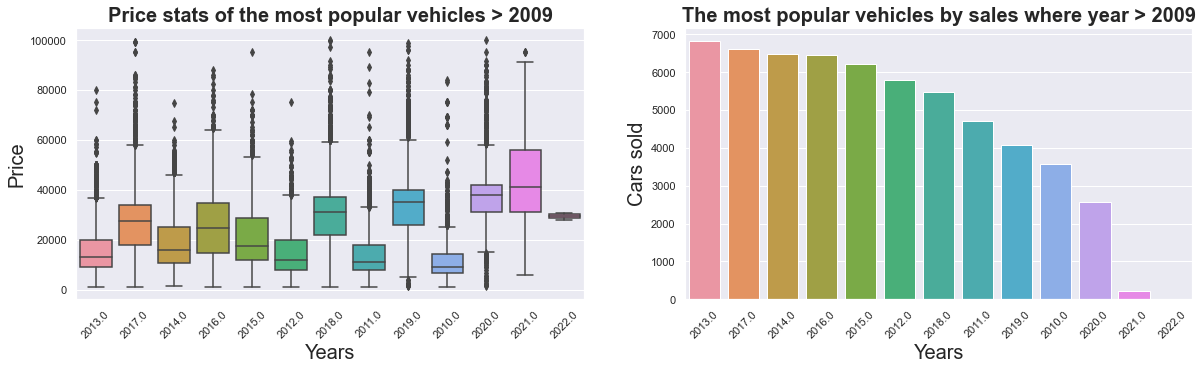

In [978]:
print("\nTop  highest selling vehicles by year.")
#print(df1['type'].value_counts())
df2=df1[df1['year']>2009]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(x = 'year',y='price',
              data = df2,
              order = df2['year'].value_counts().index, ax=ax1)
ax1.set_title("Price stats of the most popular vehicles > 2009",fontdict= { 'fontsize': 20, 'fontweight':'bold'}) 
ax1.set_xlabel("Years", fontsize = 20)
ax1.set_ylabel("Price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'year',
              data = df2,
              order = df2['year'].value_counts().index, ax=ax2)
ax2.set_title("The most popular vehicles by sales where year > 2009",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("Years", fontsize = 20)
ax2.set_ylabel("Cars sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)


#ax = sns.boxplot(x="year",y='price', data=df1, order= df1['year'].value_counts()[:10].index)



#df2.plot(kind='barh')
#df1['price'].describe()
#df1.info()

In [979]:
df1 = df1[df1.price > 2010] # get rid of antique cars where the price might be based on rarity and not the features in the data base#df1.head()

# look at object data

What's in the transmission column?


[Text(0, 0, 'automatic'), Text(1, 0, 'other'), Text(2, 0, 'manual')]

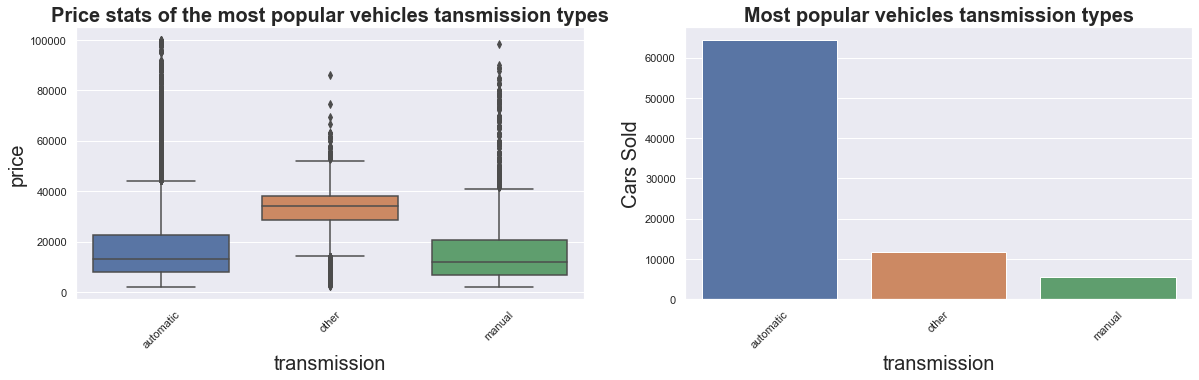

In [980]:
print("What's in the transmission column?")
#print(df1['transmission'].value_counts().plot())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.boxplot(x = 'transmission', y='price',
              data = df1,
              order = df1['transmission'].value_counts().index, ax=ax1)
ax1.set_title("Price stats of the most popular vehicles tansmission types",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("transmission", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'transmission', 
              data = df1,
              order = df1['transmission'].value_counts().index, ax=ax2)
ax2.set_title("Most popular vehicles tansmission types",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("transmission", fontsize = 20)
ax2.set_ylabel("Cars Sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)

[Text(0, 0, 'white'),
 Text(1, 0, 'black'),
 Text(2, 0, 'silver'),
 Text(3, 0, 'red'),
 Text(4, 0, 'blue'),
 Text(5, 0, 'grey'),
 Text(6, 0, 'green'),
 Text(7, 0, 'brown'),
 Text(8, 0, 'custom'),
 Text(9, 0, 'yellow'),
 Text(10, 0, 'orange'),
 Text(11, 0, 'purple')]

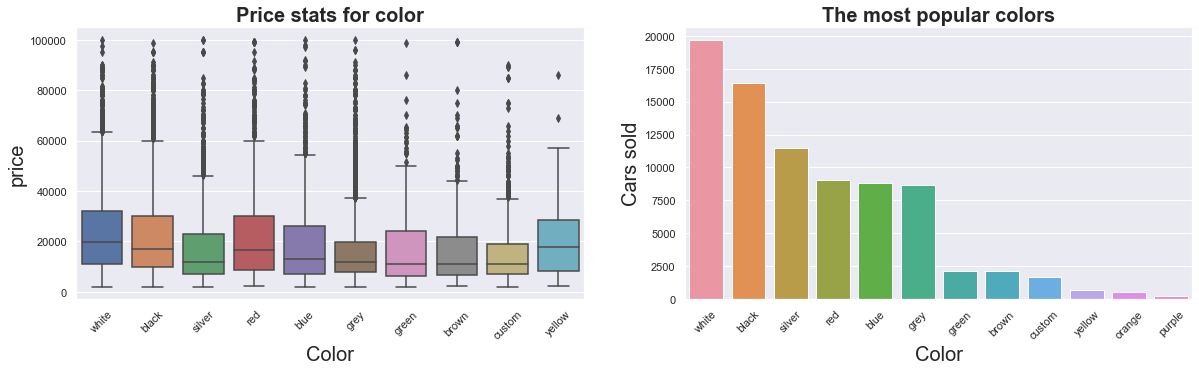

In [981]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(x = 'paint_color', y='price',
              data = df1,
              order = df1['paint_color'].value_counts()[:10].index,ax=ax1)
ax1.set_title("Price stats for color",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("Color", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'paint_color', 
              data = df1,
              order = df1['paint_color'].value_counts().index,ax=ax2)
ax2.set_title("The most popular colors",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("Color", fontsize = 20)
ax2.set_ylabel("Cars sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)

[Text(0, 0, 'f-150'),
 Text(1, 0, 'silverado 1500'),
 Text(2, 0, '1500'),
 Text(3, 0, 'corvette'),
 Text(4, 0, 'wrangler'),
 Text(5, 0, 'altima'),
 Text(6, 0, 'civic'),
 Text(7, 0, 'camry'),
 Text(8, 0, 'mustang'),
 Text(9, 0, 'escape')]

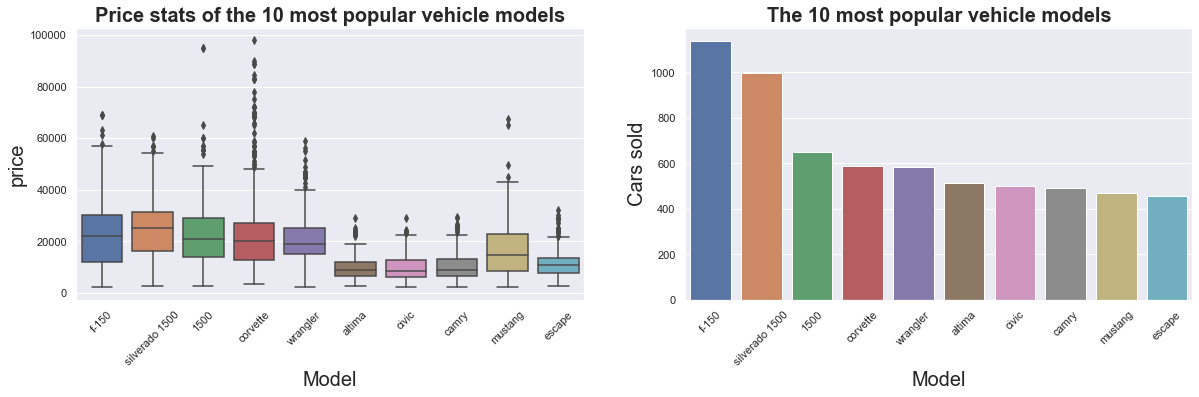

In [982]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(x = 'model', y='price',
              data = df1,
              order = df1['model'].value_counts()[:10].index,ax=ax1)
ax1.set_title("Price stats of the 10 most popular vehicle models",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("Model", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'model', 
              data = df1,
              order = df1['model'].value_counts()[:10].index,ax=ax2)
ax2.set_title("The 10 most popular vehicle models",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("Model", fontsize = 20)
ax2.set_ylabel("Cars sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)

[Text(0, 0, 'excellent'),
 Text(1, 0, 'good'),
 Text(2, 0, 'like new'),
 Text(3, 0, 'fair'),
 Text(4, 0, 'new'),
 Text(5, 0, 'salvage')]

<Figure size 1080x360 with 0 Axes>

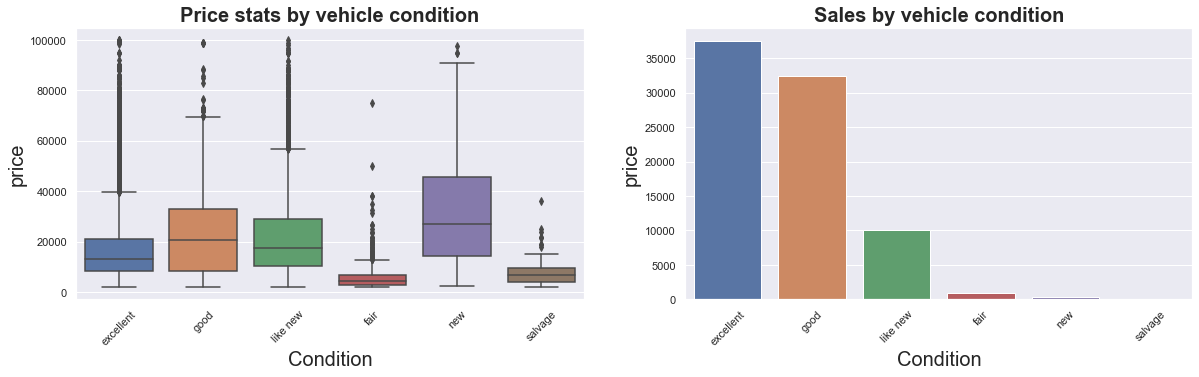

In [983]:
plt.figure(figsize=(15, 5))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.boxplot(x = 'condition', y='price',
              data = df1,
              order = df1['condition'].value_counts().index,ax=ax1)
ax1.set_title("Price stats by vehicle condition",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("Condition", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'condition', 
              data = df1,
              order = df1['condition'].value_counts().index,ax=ax2)
ax2.set_title("Sales by vehicle condition",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("Condition", fontsize = 20)
ax2.set_ylabel("price", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)


Top 12 highest selling vehicles by type.


[Text(0, 0, 'sedan'),
 Text(1, 0, 'SUV'),
 Text(2, 0, 'truck'),
 Text(3, 0, 'pickup'),
 Text(4, 0, 'coupe'),
 Text(5, 0, 'hatchback'),
 Text(6, 0, 'other'),
 Text(7, 0, 'convertible'),
 Text(8, 0, 'van'),
 Text(9, 0, 'wagon'),
 Text(10, 0, 'mini-van'),
 Text(11, 0, 'offroad')]

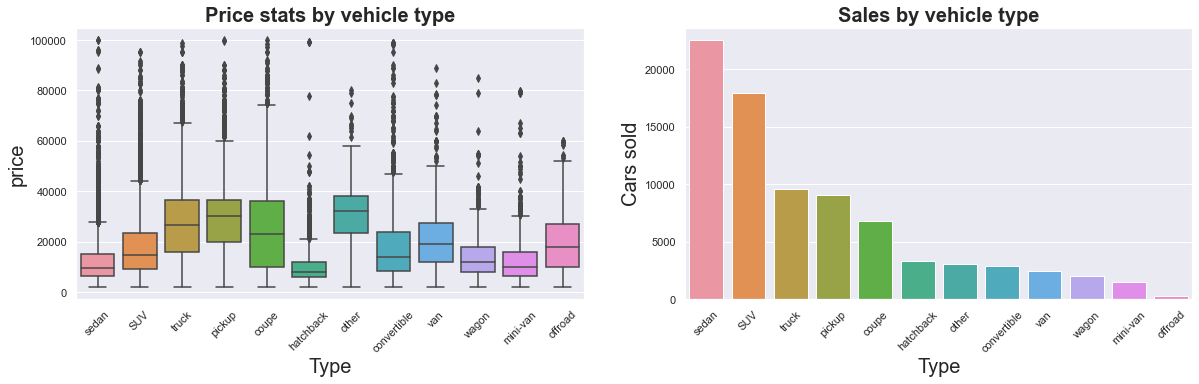

<Figure size 1080x360 with 0 Axes>

In [984]:
print("\nTop 12 highest selling vehicles by type.")
#print(df1['type'].value_counts())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'type',y='price',
              data = df1,
              order = df1['type'].value_counts()[:12].index, ax=ax1)
ax1.set_title("Price stats by vehicle type",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("Type", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)

sns.countplot(x = 'type',
              data = df1,
              order = df1['type'].value_counts()[:12].index,ax=ax2)

ax2.set_title("Sales by vehicle type",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("Type", fontsize = 20)
ax2.set_ylabel("Cars sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)


Top 20 highest selling vehicles by manufacturer.


[Text(0, 0, 'ford'),
 Text(1, 0, 'chevrolet'),
 Text(2, 0, 'toyota'),
 Text(3, 0, 'nissan'),
 Text(4, 0, 'jeep'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'gmc'),
 Text(7, 0, 'dodge'),
 Text(8, 0, 'ram'),
 Text(9, 0, 'bmw'),
 Text(10, 0, 'mercedes-benz'),
 Text(11, 0, 'hyundai')]

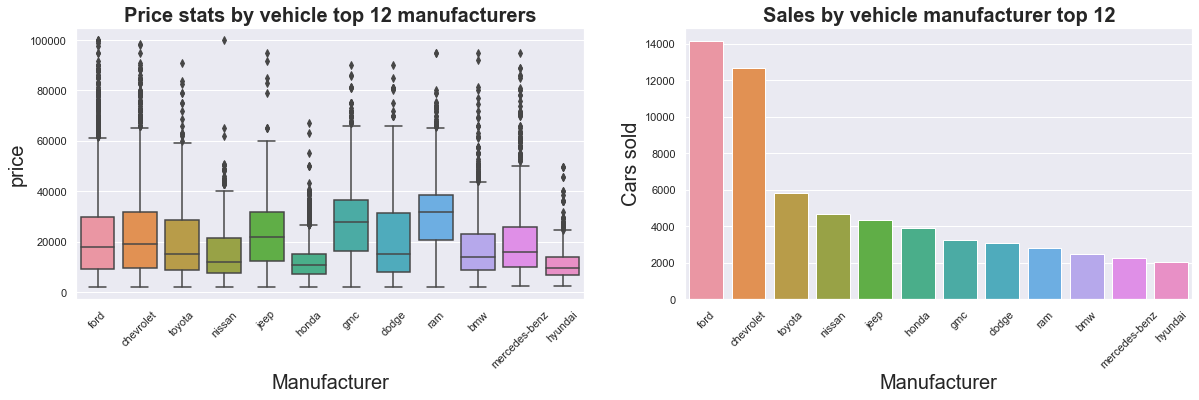

In [985]:
print("\nTop 20 highest selling vehicles by manufacturer.")
#print(df1['manufacturer'].value_counts().nlargest(20))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
ax=sns.boxplot(x = 'manufacturer', y='price',
              data = df1,
              order = df1['manufacturer'].value_counts()[:12].index, ax=ax1)
ax1.set_title("Price stats by vehicle top 12 manufacturers",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax1.set_xlabel("Manufacturer", fontsize = 20)
ax1.set_ylabel("price", fontsize = 20)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 45)


ax=sns.countplot(x = 'manufacturer',
              data = df1,
              order = df1['manufacturer'].value_counts()[:12].index, ax=ax2)
ax2.set_title("Sales by vehicle manufacturer top 12",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

ax2.set_xlabel("Manufacturer", fontsize = 20)
ax2.set_ylabel("Cars sold", fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)

## Look at numeric feature correlations
A quick look at the numeric features in the dataset shows sales price is corrilated with year (0.29), more recent the better, odometer (-.56), lower miles the better. 

In [986]:
print(df1.corr())

                id     price      year  odometer
id        1.000000 -0.065324 -0.042878  0.028498
price    -0.065324  1.000000  0.290314 -0.565981
year     -0.042878  0.290314  1.000000 -0.158121
odometer  0.028498 -0.565981 -0.158121  1.000000


# change 'condition' to ordinal data

In [987]:
condition_map = ['new','like new', 'excellent','good','fair', 'salvage']

enc=OrdinalEncoder(categories=[condition_map])
result = enc.fit_transform(df1[['condition']])
df1['condition_enc']=result
df1=df1.drop(columns=['condition'])


Change 'fuel' to dummies and concat.
Run corralation matrix.

In [989]:
dummies =pd.get_dummies(df1['fuel'])
df2 = pd.concat([df1, dummies],axis =1)

corr=abs(df2.corr().iloc[1:2])
print(corr)
#print(df3.head())

             id  price      year  odometer  condition_enc    diesel  electric  \
price  0.065324    1.0  0.290314  0.565981       0.009802  0.272973  0.014722   

            gas    hybrid     other  
price  0.267274  0.044689  0.137056  


             id  price      year  odometer  condition_enc    diesel  electric  \
price  0.065324    1.0  0.290314  0.565981       0.009802  0.272973  0.014722   

            gas    hybrid     other  ...     coupe  hatchback  mini-van  \
price  0.267274  0.044689  0.137056  ...  0.104347   0.137237  0.066703   

        offroad    other    pickup     sedan     truck      van     wagon  
price  0.004583  0.14932  0.256121  0.315413  0.233667  0.01443  0.067828  

[1 rows x 23 columns]


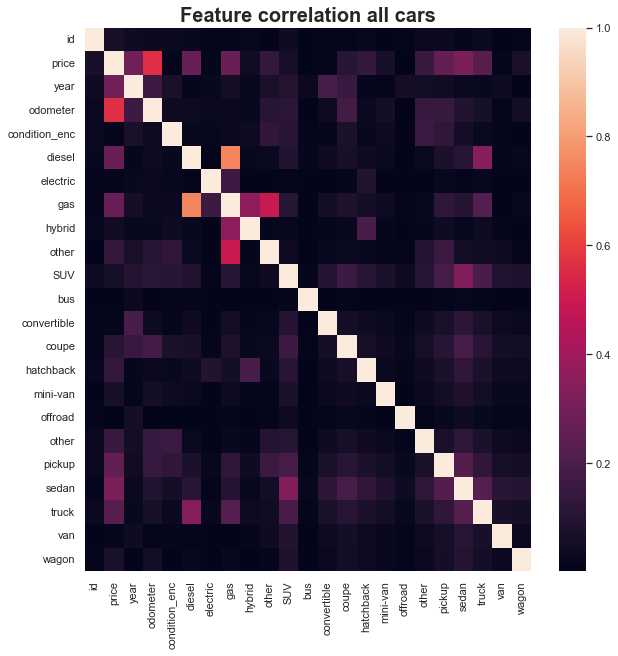

In [993]:
dummies =pd.get_dummies(df1['type'])
df3 = pd.concat([df2, dummies],axis =1)
f = plt.figure(figsize=(10, 10))
ax= sns.heatmap(abs(df3.corr()))
ax.set_title("Feature correlation all cars",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
corr=abs(df3.corr().iloc[1:2])
print(corr)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [994]:
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])
#df1['size'] = df1['size'].fillna('none')
#print(df3.head())

# Create test and train data

In [995]:
X=df3.drop(['price'], axis =1)
y=df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X1=df1.drop(['price'], axis =1)
y1=df1['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [996]:
lin_regress = LinearRegression()
lin_regress.fit(X_train, y_train)

LinearRegression()

In [997]:
train_predict = lin_regress.predict(X_train)
#train_predict = las_regress.predict(X_train)
mse = float(mean_squared_error(y_train, train_predict))

format="{:,}".format(mse)
print('Linear Regression MSE= ', format)  

sns.scatterplot(x=y_train, y=train_predict)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
plt.title('Linear Regression Actual price vs Predicted price'fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_20740/3665534810.py, line 11)

In [998]:
las_regress = Lasso()
las_regress.fit(X_train, y_train)

Lasso()

Lasso MSE=  75,483,119.9052536


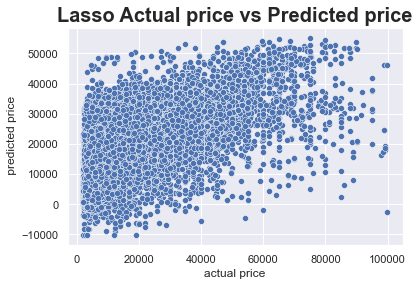

In [1002]:
train_predict = las_regress.predict(X_train)
mse = float(mean_squared_error(y_train, train_predict))
format="{:,}".format(mse)
print('Lasso MSE= ', format)  

sns.scatterplot(x=y_train, y=train_predict)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
plt.title('Lasso Actual price vs Predicted price',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

In [1003]:

X = df3[features_num_cols]
y = df3['price']
#print(df3.head())


pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])
pipe.fit(X, y)

preds = pipe.predict(X)
quad_pipe_mse = float(mean_squared_error(y, preds))
quad_reg = pipe.named_steps['quad_model']
coefs = quad_reg.coef_
format="{:,}".format(quad_pipe_mse)
print('MSE= ', format)  
print('Coefs= ',coefs)

sns.scatterplot(x=y, y=preds)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
plt.title('Actual price vs PolyFeatures Predicted price'fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_20740/1782061968.py, line 20)

Grid Search Ridge Test MSE=  75,482,264.88387671
Best Alpha: {'alpha': 10.0}


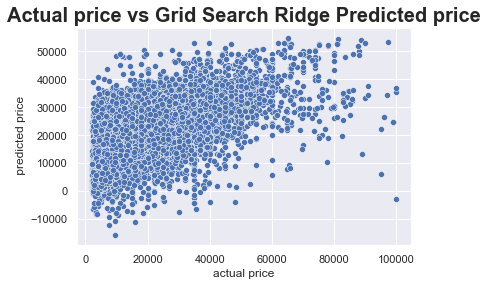

In [1005]:
params_dict = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params_dict)
grid.fit(X_train_scaled, y_train)
train_preds = grid.predict(X_train_scaled)
test_preds = grid.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
best_alpha = grid.best_params_

### END SOLUTION

# Answer check
format="{:,}".format(train_mse)

print('Grid Search Ridge Test MSE= ', format) 
print(f'Best Alpha: {best_alpha}')

ax = sns.scatterplot(x=y_test, y=test_preds)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
plt.title('Actual price vs Grid Search Ridge Predicted price',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

SequentialFeatureSelector Test MSE=  77,159,856.11439174

Features selected by SequentialFeatureSelector 
id
year
odometer
diesel
hatchback
other
pickup
sedan
truck
wagon


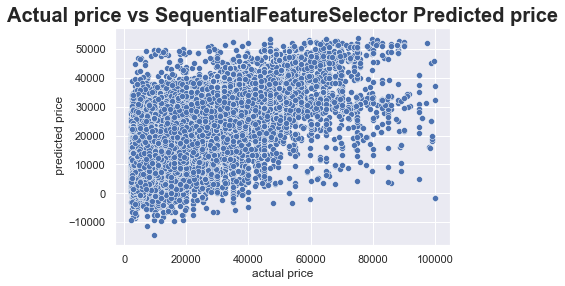

In [1007]:
X = df3.drop('price', axis = 1)
y = df3.price

#print(df3.head())

all_indicies = list(range(0, len(df3)))
#seed(42)
shuffle(all_indicies)

train_idx, test_idx = np.split(all_indicies, [350])

selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=10,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

# Answer check

format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)

ax = sns.scatterplot(x=y, y=preds)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
plt.title('Actual price vs SequentialFeatureSelector Predicted price',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

F150 correlation data and price prediction
       price      year  odometer  condition_enc    diesel       gas    hybrid  \
price    1.0  0.675684  0.593098       0.331088  0.021845  0.027686  0.018191   

          other       SUV     coupe  hatchback   offroad     other    pickup  \
price  0.033436  0.039843  0.005474   0.040575  0.025256  0.087653  0.183641   

         sedan     truck       van  
price  0.04304  0.209634  0.033242  


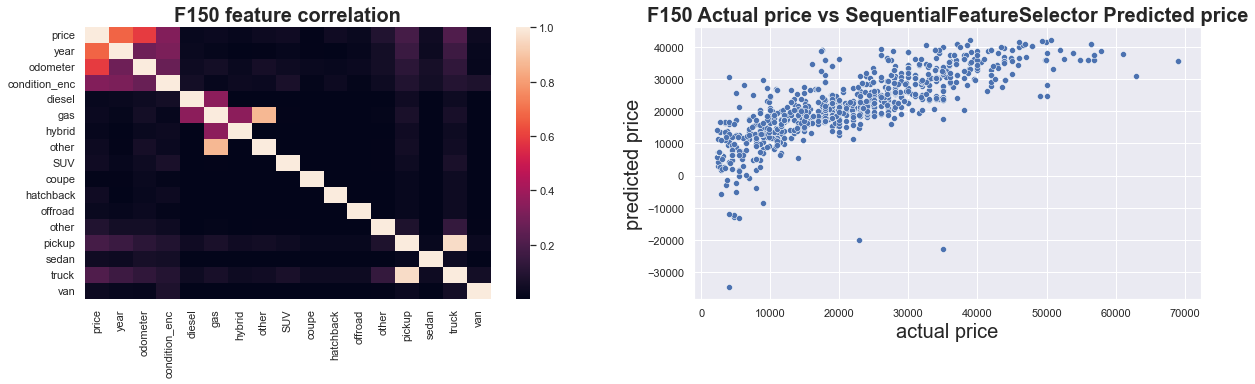

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  57,200,214.257911034

Features selected by SequentialFeatureSelector 
year
odometer
pickup
truck


In [1008]:
#F-150
#print(df1.head())
df1_model = df1[(df1.model == 'f-150')]



dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)

df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("F150 feature correlation",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

print('F150 correlation data and price prediction')
corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(40)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("F150 Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)





       price      year  odometer  condition_enc    diesel      gas    hybrid  \
price    1.0  0.759337  0.567749       0.340423  0.052522  0.05166  0.064029   

          other       SUV   offroad     other    pickup    truck  
price  0.069684  0.046272  0.086003  0.021627  0.120211  0.13094  


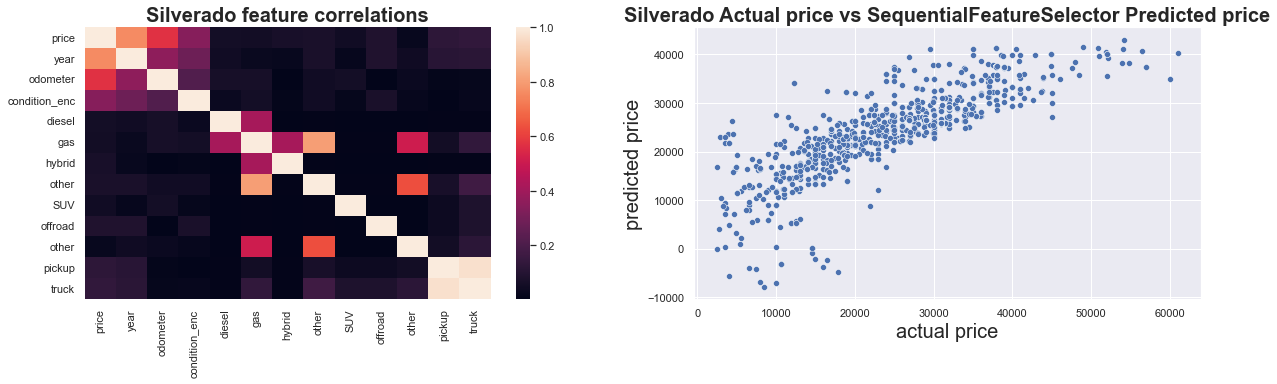

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  37,188,906.80301459

Features selected by SequentialFeatureSelector 
year
odometer
hybrid
truck


In [1009]:
#silverado 1500

df1_model = df1[(df1.model == 'silverado 1500')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("Silverado feature correlations",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(41)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("Silverado Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)


       price      year  odometer  condition_enc       gas     other       SUV  \
price    1.0  0.233288  0.543646       0.260555  0.016446  0.016446  0.172007   

       convertible     coupe  hatchback     other     sedan     truck  
price      0.15341  0.126154   0.115833  0.026974  0.051498  0.155891  


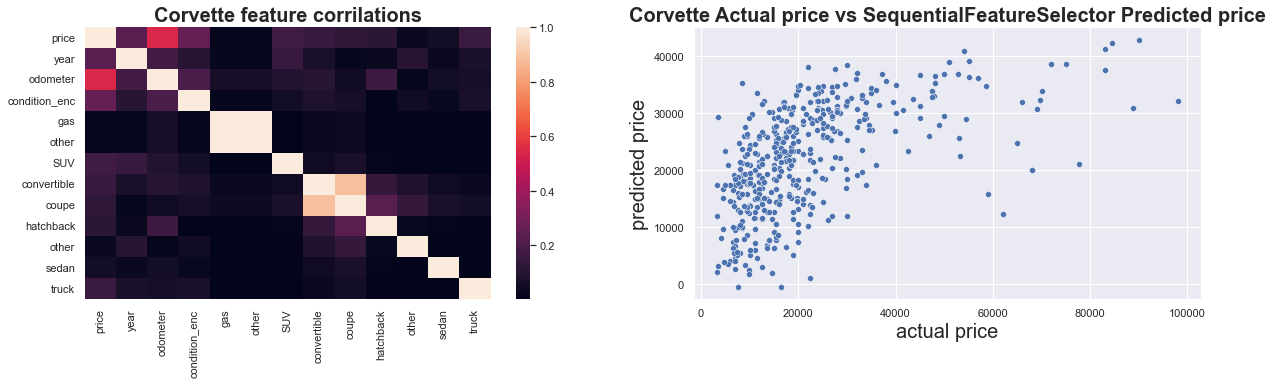

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  167,837,477.88608992

Features selected by SequentialFeatureSelector 
year
odometer
coupe
hatchback


In [1010]:
#corvette

df1_model = df1[(df1.model == 'corvette')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("Corvette feature corrilations",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(41)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("Corvette Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)


       price     year  odometer  condition_enc       gas    hybrid     coupe  \
price    1.0  0.77635   0.68409       0.160153  0.045521  0.045521  0.101011   

       hatchback     other     sedan  
price   0.052356  0.061713  0.129844  


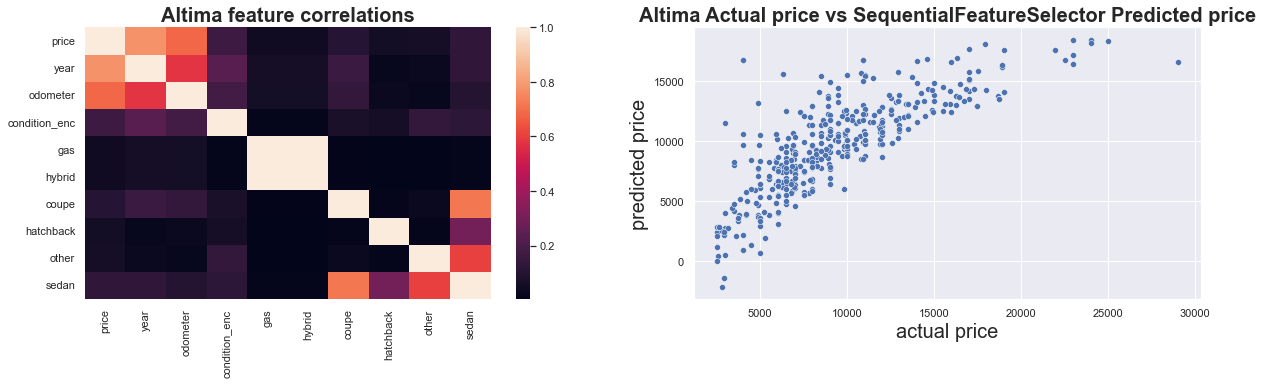

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  7,305,409.628968878

Features selected by SequentialFeatureSelector 
year
odometer
condition_enc
coupe


In [1011]:
#altima

df1_model = df1[(df1.model == 'altima')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("Altima feature correlations",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(41)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("Altima Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)


       price      year  odometer  condition_enc    diesel  electric       gas  \
price    1.0  0.255636  0.606214       0.010044  0.009838  0.104241  0.120957   

        hybrid     other  sedan  
price  0.00443  0.159399    NaN  


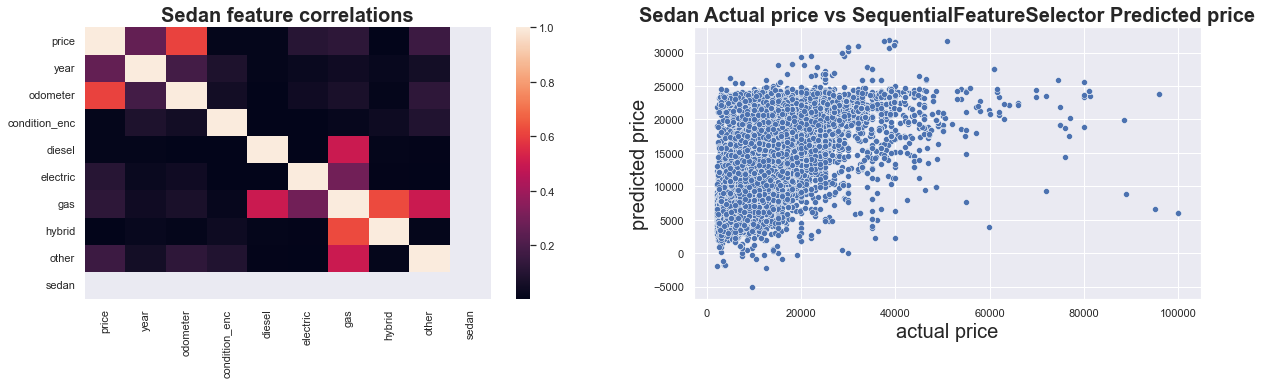

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  48,467,874.49764858

Features selected by SequentialFeatureSelector 
year
odometer
gas
other


In [1012]:
#sedan

df1_model = df1[(df1.type == 'sedan')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("Sedan feature correlations",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(40)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("Sedan Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)


       price      year  odometer  condition_enc    diesel  electric       gas  \
price    1.0  0.513948  0.601881       0.086567  0.044701  0.091123  0.137432   

         hybrid     other  SUV  
price  0.014229  0.139992  NaN  


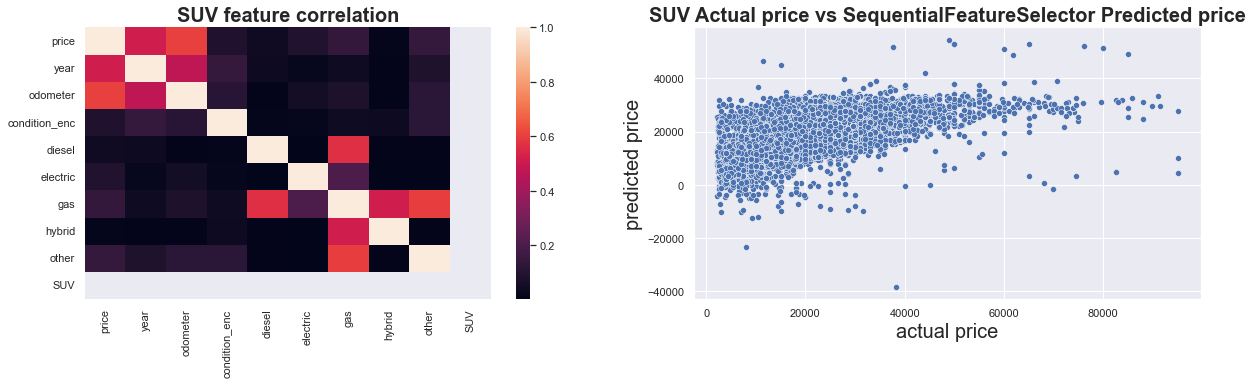

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  71,218,021.31067275

Features selected by SequentialFeatureSelector 
year
odometer
electric
gas


In [1013]:
#suv

df1_model = df1[(df1.type == 'SUV')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("SUV feature correlation",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(40)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("SUV Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)



Truck feature correlation
       price      year  odometer  condition_enc    diesel       gas    hybrid  \
price    1.0  0.494659  0.410944        0.32707  0.407421  0.401204  0.028596   

          other  truck  
price  0.018354    NaN  


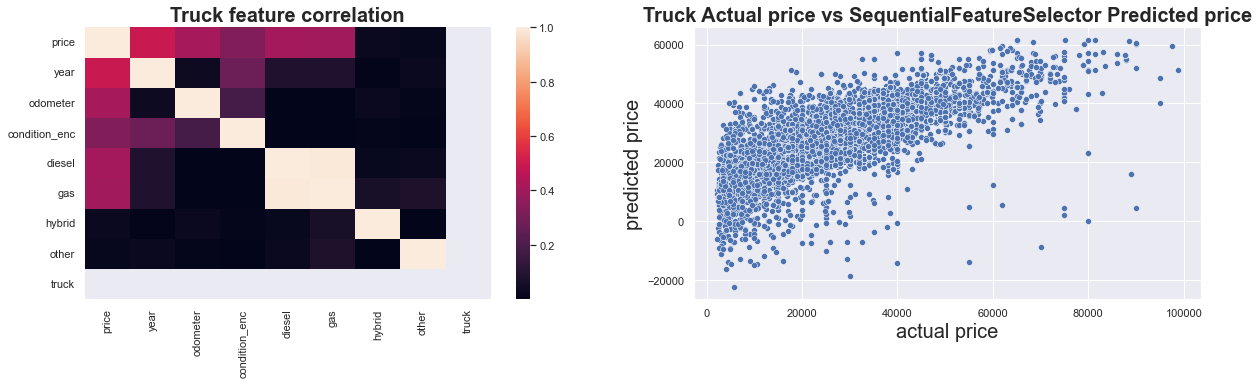

<Figure size 720x720 with 0 Axes>

SequentialFeatureSelector Test MSE=  98,745,702.3956541

Features selected by SequentialFeatureSelector 
year
odometer
condition_enc
diesel


In [1014]:
#truck

df1_model = df1[(df1.type == 'truck')]

dummies =pd.get_dummies(df1_model['fuel'])
df3 = pd.concat([df1_model, dummies],axis =1)

dummies =pd.get_dummies(df1_model['type'])
df3 = pd.concat([df3, dummies],axis =1)


df3 = df3.drop(columns=['id'])
df3 = df3.drop(columns=['model'])
df3 = df3.drop(columns=['fuel'])
df3 = df3.drop(columns=['title_status'])
df3 = df3.drop(columns=['transmission'])
df3 = df3.drop(columns=['drive'])
df3 = df3.drop(columns=['size'])
df3 = df3.drop(columns=['type'])
df3 = df3.drop(columns=['paint_color'])
df3 = df3.drop(columns=['state'])

df3 = df3.drop(columns=['cylinders'])
df3 = df3.drop(columns=['manufacturer'])

#print(df3.head())
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
f = plt.figure(figsize=(10, 10))
sns.heatmap(abs(df3.corr()),ax=ax1)
ax1.set_title("Truck feature correlation",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
print('\nTruck feature correlation')
corr=abs(df3.corr().iloc[:1])
print(corr)

X = df3.drop('price', axis = 1)
y = df3['price']

all_indicies = list(range(0, len(df3)))
seed(40)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

    
lr = LinearRegression().fit(Xt,y)
preds = lr.predict(Xt)
train_mse = mean_squared_error(preds, y)
test_mse = mean_squared_error(preds, y)

sns.scatterplot(x=y, y=preds, ax=ax2)
ax2.set_title("Truck Actual price vs SequentialFeatureSelector Predicted price",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax2.set_xlabel("actual price", fontsize = 20)
ax2.set_ylabel("predicted price", fontsize = 20)



plt.show()
format="{:,}".format(test_mse)
print('SequentialFeatureSelector Test MSE= ', format) 

print('\nFeatures selected by SequentialFeatureSelector ')
for col in features_df_new.columns:
    print(col)


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Final Evaluation